# Análisis exploratorio

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Medidas de tendencia central

In [ ]:
# Generar datos de ejemplo
np.random.seed(0)
data = np.random.normal(loc=0, scale=1, size=100)
data

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ,
        0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
        0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574,
       -2.55298982,  0.6536186 ,  0.8644362 , -0.74216502,  2.26975462,
       -1.45436567,  0.04575852, -0.18718385,  1.53277921,  1.46935877,
        0.15494743,  0.37816252, -0.88778575, -1.98079647, -0.34791215,
        0.15634897,  1.23029068,  1.20237985, -0.38732682, -0.30230275,
       -1.04855297, -1.42001794, -1.70627019,  1.9507754 , -0.50965218,
       -0.4380743 , -1.25279536,  0.77749036, -1.61389785, -0.21274028,
       -0.89546656,  0.3869025 , -0.51080514, -1.18063218, -0.02818223,
        0.42833187,  0.06651722,  0.3024719 , -0.63432209, -0.36274117,
       -0.67246045, -0.35955316, -0.81314628, -1.7262826 ,  0.17742614,
       -0.40178094, -1.63019835,  0.46278226, -0.90729836,  0.05

In [ ]:
print("Desviación estándar : {:.4f}".format(data.std()))
print("Mediana : {:.4f}".format(np.median(data)))
print("Media : {:.4f}".format(data.mean()))

Desviación estándar : 1.0079
Mediana : 0.0941
Media : 0.0598


***Intrepretación de desviación estándar***

La ***desviación estándar*** es una medida de dispersión que indica cuánto varían los valores de un conjunto de datos con respecto a la media.

***Interpretar la desviación estándar implica entender qué tan dispersos están los datos en relación con la media***. Una desviación estándar grande indica que los datos están muy dispersos alrededor de la media, mientras que una desviación estándar pequeña indica que los datos están más cerca de la media.

Por ejemplo, si estamos analizando las alturas de un grupo de personas y encontramos que la desviación estándar es pequeña, se puede interpretar esto como que la mayoría de las personas tienen alturas cercanas a la media, lo que sugiere una distribución más homogénea de las alturas en el grupo. Por otro lado, si la desviación estándar es grande, esto podría indicar que las alturas de las personas varían considerablemente alrededor de la media, lo que sugiere una distribución más dispersa de las alturas en el grupo.

In [ ]:
media, std = data.mean(), data.std()
print("[{0:.2f}, {0:.2f}]".format(media - std, media + std))

[-0.95, -0.95]


In [ ]:
print(np.sum((data > (media - std)) & (data < (media + std)))/len(data))

0.67


In [ ]:
print("[{0:.2f}, {0:.2f}]".format(media - 2*std, media + 2*std))
print(np.sum((data > (media - 2*std)) & (data < (media + 2*std)))/len(data))

[-1.96, -1.96]
0.96


## Medidas de posición

In [ ]:
print("{0:<15}: {1:.4f}".format("Primer cuartil",np.quantile(data, 0.25)))
print("{0:<15}: {1:.4f}".format("Segundo cuartil",np.quantile(data, 0.5)))
print("{0:<15}: {1:.4f}".format("Tercer cuartil",np.quantile(data, 0.75)))


Primer cuartil : -0.6439
Segundo cuartil: 0.0941
Tercer cuartil : 0.7371


***Interpretaciones***

+ Aproximadamente el 75% de los datos es menor a 0.7371; por ende, el 25% de los datos es superior a ese valor.
+ Aproximadamente el 50% de los datos es menor a 0.0941; por ende, el 50% de los datos es superior a ese valor.
+ Aproximadamente el 25% de los datos es menor a -0.6439; por ende, el 75% de los datos es superior a ese valor.


---



***Utilidad de los cuartiles***

Por ejemplo, si estamos analizando los salarios de los empleados en una empresa, el tercer cuartil nos indicará el salario por debajo del cual se encuentran el 75% de los empleados, lo que podría ser útil para comprender la estructura salarial de la organización

In [ ]:
# Para comprobar :-)
print(np.sum(data > np.quantile(data, 0.75)))
print(np.sum(data < np.quantile(data, 0.25)))

25
25


In [ ]:
# Revisa la existencia de valores atípicos
# Calcular cuartiles
Q1 = np.quantile(data, 0.25)
Q3 = np.quantile(data, 0.75)

# Calcular el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Identificar valores atípicos
outliers = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))
total_atipicos, porcentaje = len(data[outliers].tolist()), 100*len(data[outliers].tolist())/data.shape[0]
print("Existen {0} valores atípicos que representa un {1:.2f}% de los valores de la columna".format(total_atipicos, porcentaje))

Existen 0 valores atípicos que representa un 0.00% de los valores de la columna


## Gráficos para ayudar las interpretaciones

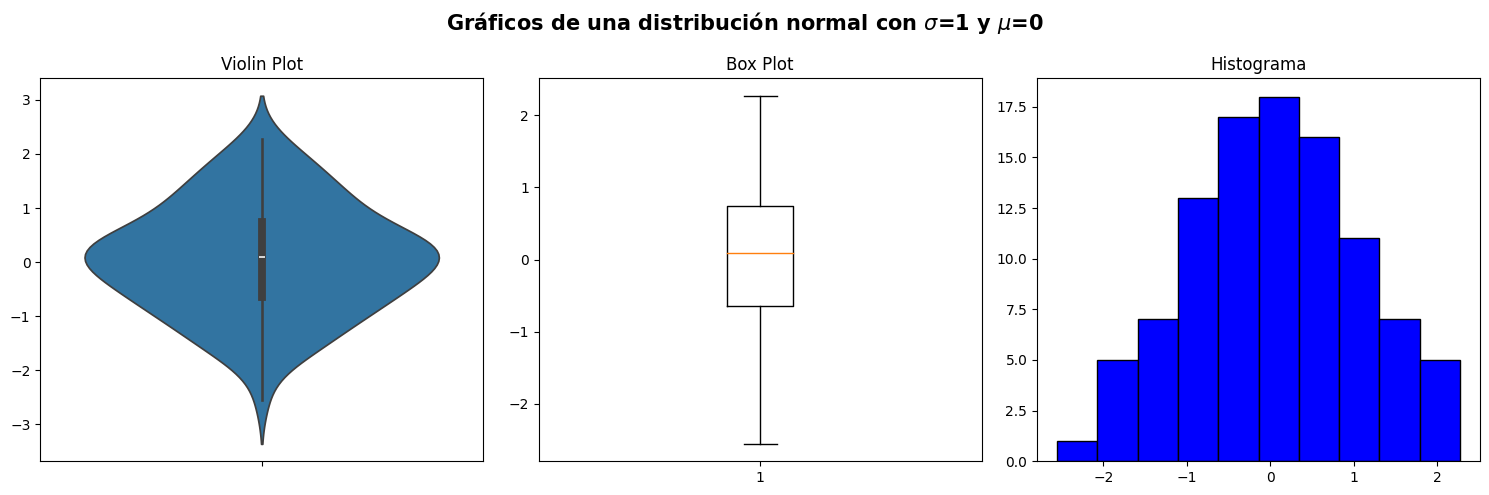

In [ ]:
# Crear una figura y subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Trazar el primer gráfico (violin plot) en el primer subplot
sns.violinplot(data=data, ax=axs[0])
axs[0].set_title('Violin Plot')

# Trazar el segundo gráfico (box plot) en el segundo subplot
axs[1].boxplot(data)
axs[1].set_title('Box Plot')

# Trazar el tercer gráfico (histograma) en el tercer subplot
axs[2].hist(data, bins=10, color='blue', edgecolor='black')
axs[2].set_title('Histograma')

# Tìtulo del gráfico
plt.suptitle(r"Gráficos de una distribución normal con $\sigma$=1 y $\mu$=0", fontsize=15, fontweight="bold")
# Ajustar automáticamente los espaciados para que los subplots no se superpongan
plt.tight_layout()
# Mostrar la figura
plt.show()

